### Business Requirement/ Objective

*   The dataset contains the features which includes the survival analysis and prediction of an employee, whether he/she would attrite or not.



### Libraries

In [ ]:
#Loading all required libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler as mms

### Exploratory data analysis

In [ ]:
#reading the CSV file
df=pd.read_csv('Final dataset Attrition.csv')

In [ ]:
# amking a copy in diffrent dataframe for later use
df_data=df.copy()

In [ ]:
#printing first 5 value of dataframe
df_data.head()
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()


In [ ]:
# dropping irrelevant feature from dataframe
df_data=df_data.drop(['Date_of_termination','Date_of_Hire','Unnamed: 32'],axis=1)
df_data.head()

Age Attrition BusinessTravel              Department  DistanceFromHome  \
0   37       Yes  Travel_Rarely  Research & Development                 2   
1   21        No  Travel_Rarely  Research & Development                15   
2   45        No  Travel_Rarely  Research & Development                 6   
3   23        No  Travel_Rarely                   Sales                 2   
4   22        No  Travel_Rarely  Research & Development                15   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0    Male               2         1  Laboratory Technician                3   
1    Male               3         1     Research Scientist                4   
2    Male               3         3      Research Director                1   
3    Male               3         1   Sales Representative                1   
4  Female               3         1  Laboratory Technician                4   

   ... YearsSinceLastPromotion  YearsWithCurrManager  Higher_Education  \
0  ...                       0                     0        Graduation   
1  ...                       0                     0        Graduation   
2  ...                       0                     0   Post-Graduation   
3  ...                       0                     0               PHD   
4  ...                       0                     0               PHD   

    Status_of_leaving  Mode_of_work  Leaves  Absenteeism  Work_accident  \
0              Salary        OFFICE       4            2             No   
1       Work Accident           WFH       5            2             No   
2           Dept.Head           WFH       1            3             No   
3       Work Accident        OFFICE       1            0            Yes   
4  Better Opportunity           WFH       5            2             No   

   Source_of_Hire   Job_mode  
0       Job Event   Contract  
1       Recruiter  Part Time  
2       Job Event   Contract  
3       Recruiter   FullTime  
4       Job Event   Contract  

[5 rows x 30 columns]

In [ ]:
df_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Status_of_leaving', 'Mode_of_work', 'Leaves', 'Absenteeism',
       'Work_accident', 'Source_of_Hire', 'Job_mode'],
      dtype='object')

In [ ]:
# Checking whether the datset has any missing values within
df_data.isna().sum() 

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Higher_Education           0
Status_of_leaving          0
Mode_of_work               0
Leaves                     0
Absenteeism                0
Work_accident              0
Source_of_Hire             0
Job_mode                   0
dtype: int64

In [ ]:
# Perinting basic statistics of all feature
df_data.describe()

Age  DistanceFromHome  JobInvolvement     JobLevel  \
count  1470.000000       1470.000000     1470.000000  1470.000000   
mean     36.923810          9.192517        2.729932     2.063946   
std       9.135373          8.106864        0.711561     1.106940   
min      18.000000          1.000000        1.000000     1.000000   
25%      30.000000          2.000000        2.000000     1.000000   
50%      36.000000          7.000000        3.000000     2.000000   
75%      43.000000         14.000000        3.000000     3.000000   
max      60.000000         29.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count      1470.000000    1470.000000         1470.000000        1470.000000   
mean          2.728571    6502.931293            2.693197          15.209524   
std           1.102846    4707.956783            2.498009           3.659938   
min           1.000000    1009.000000            0.000000          11.000000   
25%           2.000000    2911.000000            1.000000          12.000000   
50%           3.000000    4919.000000            2.000000          14.000000   
75%           4.000000    8379.000000            4.000000          18.000000   
max           4.000000   19999.000000            9.000000          25.000000   

       PerformanceRating  StockOptionLevel  TotalWorkingYears  \
count        1470.000000       1470.000000        1470.000000   
mean            3.153741          0.793878          11.279592   
std             0.360824          0.852077           7.780782   
min             3.000000          0.000000           0.000000   
25%             3.000000          0.000000           6.000000   
50%             3.000000          1.000000          10.000000   
75%             3.000000          1.000000          15.000000   
max             4.000000          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            1470.000000     1470.000000              1470.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.289271        6.126525                 3.222430   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager       Leaves  Absenteeism  
count           1470.000000  1470.000000  1470.000000  
mean               4.123129     2.568707     1.525170  
std                3.568136     1.716171     1.097856  
min                0.000000     0.000000     0.000000  
25%                2.000000     1.000000     1.000000  
50%                3.000000     3.000000     2.000000  
75%                7.000000     4.000000     2.000000  
max               17.000000     5.000000     3.000000

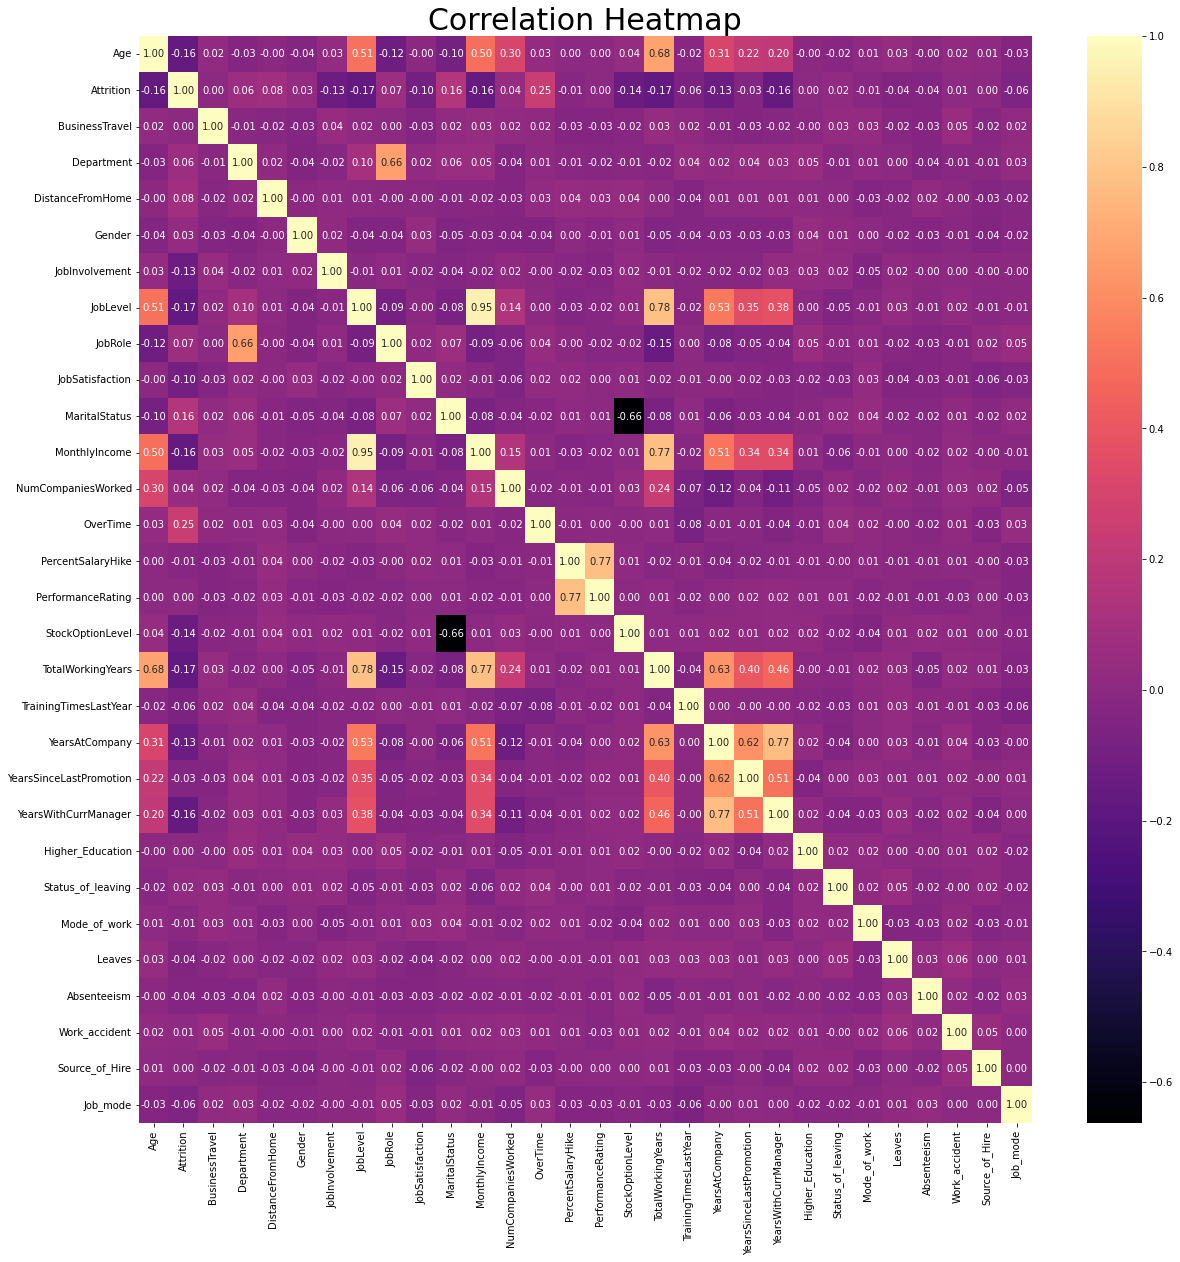

In [ ]:
#plotting Correlation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_data.corr(), annot=True, fmt='.2f', cmap='magma') 
plt.title('Correlation Heatmap', fontsize=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


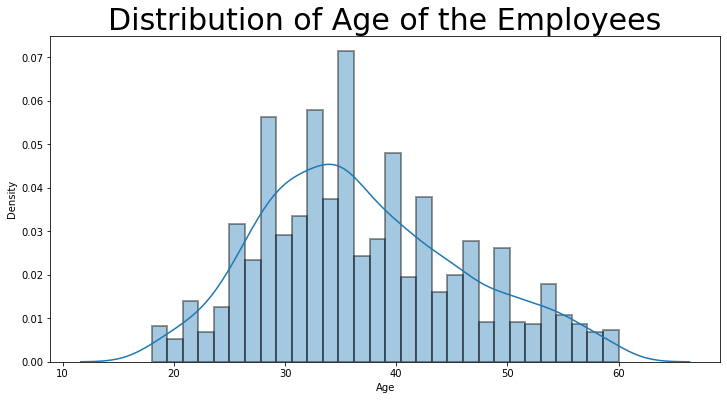

In [ ]:
#plotting distribution of age of all employee
plt.figure(figsize=(12,6))
sns.distplot(df_data['Age'], bins=30, hist_kws=dict(edgecolor='black', linewidth=2)) 
plt.title('Distribution of Age of the Employees', fontsize=30)
plt.xlabel('Age')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


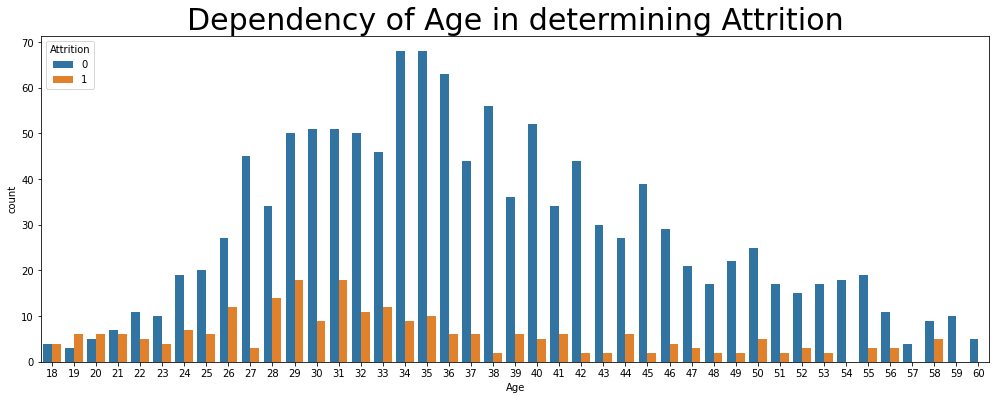

In [ ]:
plt.figure(figsize=(17,6))
sns.countplot('Age', hue='Attrition', data=df_data)
plt.title('Dependency of Age in determining Attrition', fontsize=30) 
plt.xlabel('Age')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


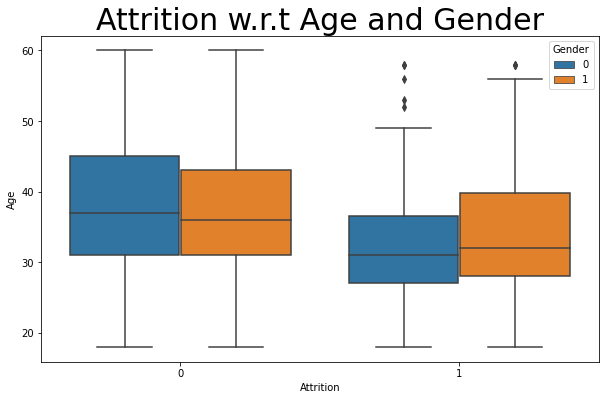

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot('Attrition', 'Age', hue='Gender', data=df_data) 
plt.title('Attrition w.r.t Age and Gender', fontsize=30)
plt.xlabel('Attrition')
plt.show()



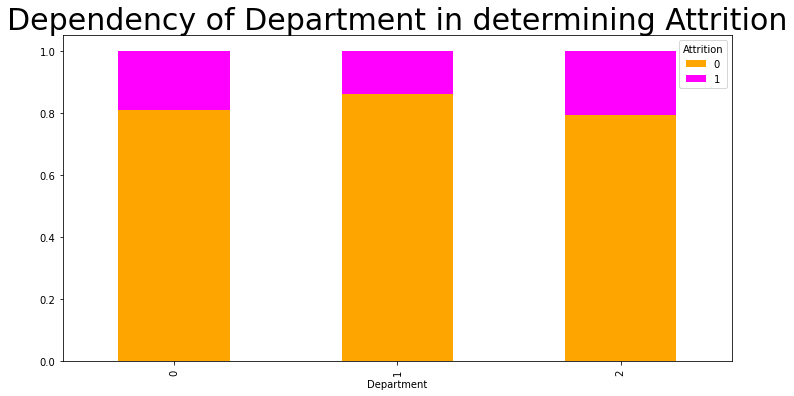

In [ ]:
data=pd.crosstab(df_data['Department'], df_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'magenta'], 
figsize=(12,6))
plt.title('Dependency of Department in determining Attrition', fontsize=30) 
plt.xlabel('Department')
plt.show()


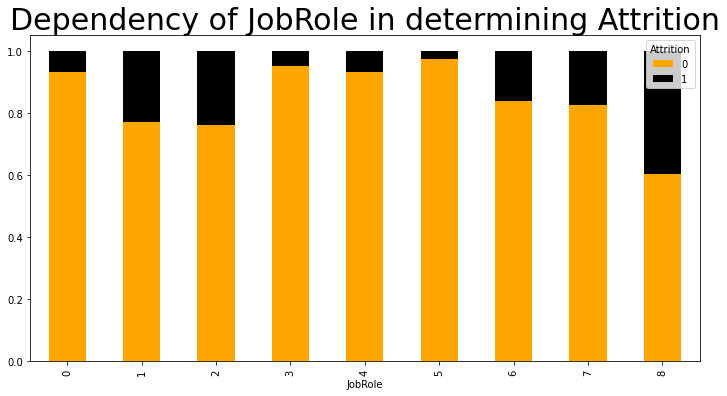

In [ ]:
data=pd.crosstab(df_data['JobRole'], df_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
figsize=(12,6))
plt.title('Dependency of JobRole in determining Attrition', fontsize=30) 
plt.xlabel('JobRole')
plt.show()


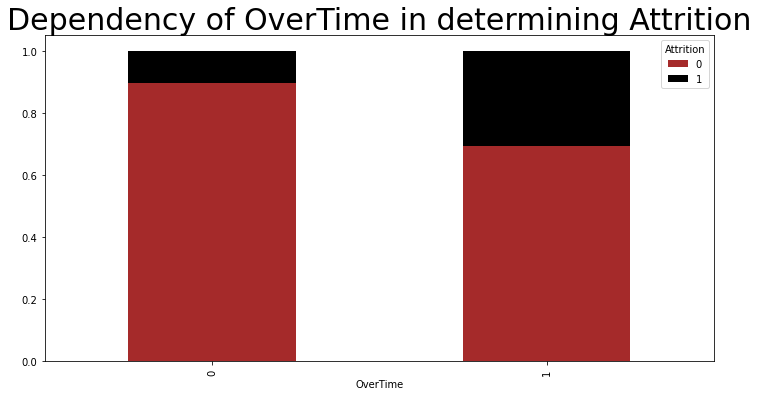

In [ ]:
data=pd.crosstab(df_data['OverTime'], df_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['brown', 'black'], 
figsize=(12,6))
plt.title('Dependency of OverTime in determining Attrition', fontsize=30) 
plt.xlabel('OverTime')
plt.show()


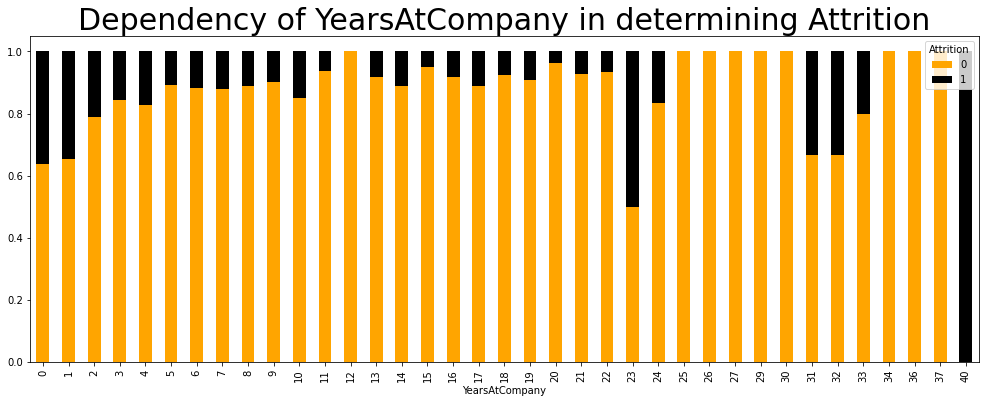

In [ ]:
data=pd.crosstab(df_data['YearsAtCompany'], df_data['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'black'], 
figsize=(17,6))
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30) 
plt.xlabel('YearsAtCompany')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


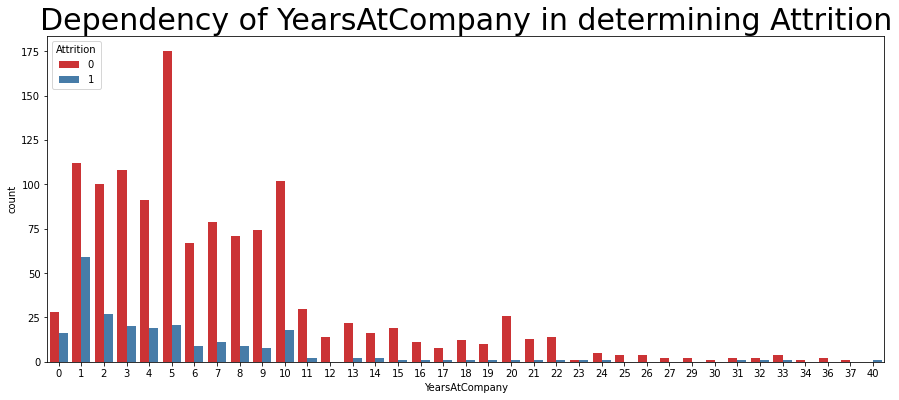

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('YearsAtCompany', hue='Attrition', data=df_data, palette='Set1') 
plt.title('Dependency of YearsAtCompany in determining Attrition', fontsize=30)
plt.xlabel('YearsAtCompany')
plt.show()


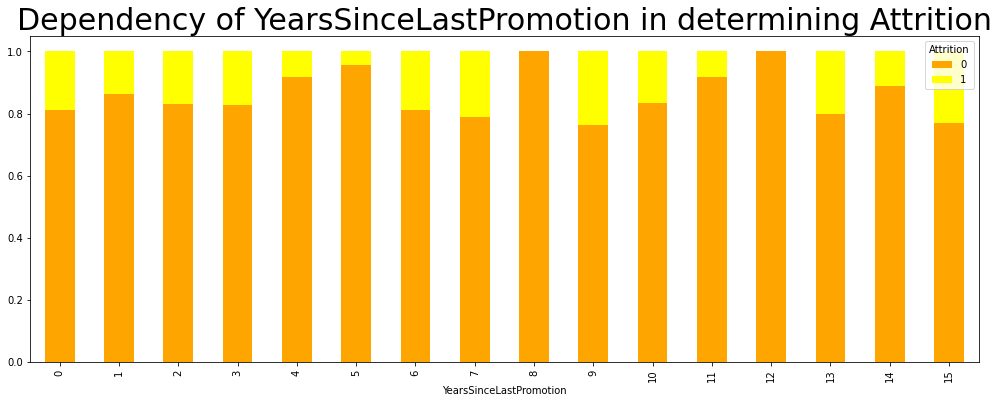

In [ ]:
data=pd.crosstab(df_data['YearsSinceLastPromotion'], df_data['Attrition']) 
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orange', 'yellow'],
figsize=(17,6))
plt.title('Dependency of YearsSinceLastPromotion in determining Attrition', fontsize=30) 
plt.xlabel('YearsSinceLastPromotion')
plt.show()


In [ ]:
# add Utility auto detecting categorical variable
def utility_preprocess(df_data):
  col_name_list=list(df_data.columns)
  col_count=[]
  for col in col_name_list:
    col_count.append(df_data[col].nunique())
  for i in range(len(col_count)):
    print('The feature {} contain {} unique value'.format(col_name_list[i],col_count[i]))
utility_preprocess(df_data)    

The feature Age contain 43 unique value
The feature Attrition contain 2 unique value
The feature BusinessTravel contain 3 unique value
The feature Department contain 3 unique value
The feature DistanceFromHome contain 29 unique value
The feature Gender contain 2 unique value
The feature JobInvolvement contain 4 unique value
The feature JobLevel contain 5 unique value
The feature JobRole contain 9 unique value
The feature JobSatisfaction contain 4 unique value
The feature MaritalStatus contain 3 unique value
The feature MonthlyIncome contain 1349 unique value
The feature NumCompaniesWorked contain 10 unique value
The feature OverTime contain 2 unique value
The feature PercentSalaryHike contain 15 unique value
The feature PerformanceRating contain 2 unique value
The feature StockOptionLevel contain 4 unique value
The feature TotalWorkingYears contain 40 unique value
The feature TrainingTimesLastYear contain 7 unique value
The feature YearsAtCompany contain 37 unique value
The feature Yea

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


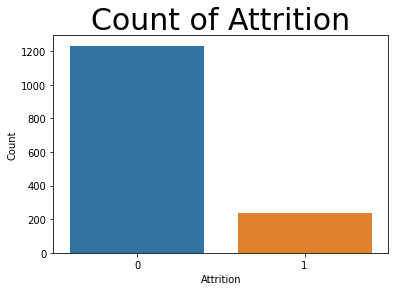

In [ ]:
sns.countplot('Attrition', data=df_data) 
plt.title('Count of Attrition', fontsize=30)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()


### Data wrangling

In [ ]:
# function to convert  categorical ino numerical so that fitted into model
def preprocess_categorical_data(df):
  # Category columns in the data
  category_cols = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Work_accident', 'Source_of_Hire', 'Job_mode']
  le = LabelEncoder()
  df_data[category_cols] = df_data[category_cols].apply(le.fit_transform)
  return df_data  
    

In [ ]:
#function for min max normalization
def preprocess_min_max(df):
  scale = mms() 
  df_data1 = pd.DataFrame(scale.fit_transform(df_data.iloc[:,:]))
  df_data1.columns=df_data.columns
  return df_data1

In [ ]:
df_data=preprocess_categorical_data(df_data)
df_data1=preprocess_min_max(df_data)

In [ ]:
df_data1


Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
0     0.452381        1.0             1.0         0.5          0.035714   
1     0.071429        0.0             1.0         0.5          0.500000   
2     0.642857        0.0             1.0         0.5          0.178571   
3     0.119048        0.0             1.0         1.0          0.035714   
4     0.095238        0.0             1.0         0.5          0.500000   
...        ...        ...             ...         ...               ...   
1465  0.809524        0.0             1.0         1.0          0.071429   
1466  0.880952        0.0             1.0         0.5          0.000000   
1467  0.880952        0.0             1.0         1.0          0.892857   
1468  0.952381        0.0             1.0         1.0          0.321429   
1469  0.952381        1.0             1.0         0.5          0.785714   

      Gender  JobInvolvement  JobLevel  JobRole  JobSatisfaction  ...  \
0        1.0        0.333333      0.00    0.250         0.666667  ...   
1        1.0        0.666667      0.00    0.750         1.000000  ...   
2        1.0        0.666667      0.50    0.625         0.000000  ...   
3        1.0        0.666667      0.00    1.000         0.000000  ...   
4        0.0        0.666667      0.00    0.250         1.000000  ...   
...      ...             ...       ...      ...              ...  ...   
1465     1.0        0.333333      0.75    0.375         0.000000  ...   
1466     1.0        0.666667      1.00    0.375         0.000000  ...   
1467     1.0        0.333333      1.00    0.375         1.000000  ...   
1468     1.0        0.666667      0.75    0.875         0.666667  ...   
1469     0.0        0.666667      0.50    0.000         1.000000  ...   

      YearsSinceLastPromotion  YearsWithCurrManager  Higher_Education  \
0                    0.000000              0.000000          0.333333   
1                    0.000000              0.000000          0.333333   
2                    0.000000              0.000000          1.000000   
3                    0.000000              0.000000          0.666667   
4                    0.000000              0.000000          0.666667   
...                       ...                   ...               ...   
1465                 0.066667              0.941176          1.000000   
1466                 0.266667              0.764706          1.000000   
1467                 0.133333              0.764706          1.000000   
1468                 0.066667              0.470588          0.666667   
1469                 1.000000              0.352941          0.000000   

      Status_of_leaving  Mode_of_work  Leaves  Absenteeism  Work_accident  \
0                  0.50           0.0     0.8     0.666667            0.0   
1                  0.75           1.0     1.0     0.666667            0.0   
2                  0.25           1.0     0.2     1.000000            0.0   
3                  0.75           0.0     0.2     0.000000            1.0   
4                  0.00           1.0     1.0     0.666667            0.0   
...                 ...           ...     ...          ...            ...   
1465               0.50           0.0     0.6     0.666667            0.0   
1466               0.75           1.0     0.2     0.333333            0.0   
1467               0.75           0.0     0.4     0.333333            0.0   
1468               1.00           1.0     0.4     0.666667            1.0   
1469               1.00           1.0     0.8     1.000000            1.0   

      Source_of_Hire  Job_mode  
0           0.000000       0.0  
1           0.666667       1.0  
2           0.000000       0.0  
3           0.666667       0.5  
4           0.000000       0.0  
...              ...       ...  
1465        0.333333       1.0  
1466        1.000000       0.5  
1467        0.666667       1.0  
1468        0.000000       1.0  
1469        0.333333       0.5  

[1470 rows x 30 columns]

In [ ]:
df_data1.isna().mean(axis=0)

Age                        0.0
Attrition                  0.0
BusinessTravel             0.0
Department                 0.0
DistanceFromHome           0.0
Gender                     0.0
JobInvolvement             0.0
JobLevel                   0.0
JobRole                    0.0
JobSatisfaction            0.0
MaritalStatus              0.0
MonthlyIncome              0.0
NumCompaniesWorked         0.0
OverTime                   0.0
PercentSalaryHike          0.0
PerformanceRating          0.0
StockOptionLevel           0.0
TotalWorkingYears          0.0
TrainingTimesLastYear      0.0
YearsAtCompany             0.0
YearsSinceLastPromotion    0.0
YearsWithCurrManager       0.0
Higher_Education           0.0
Status_of_leaving          0.0
Mode_of_work               0.0
Leaves                     0.0
Absenteeism                0.0
Work_accident              0.0
Source_of_Hire             0.0
Job_mode                   0.0
dtype: float64

In [ ]:
df_data1['Attrition'].value_counts()

0.0    1233
1.0     237
Name: Attrition, dtype: int64

### Feature Engineering<br>
    

*   Feature engineering required for our problem statement. We have also calculated feature importance for each model and then finally using XGboost we have used most important feature and trained our model.




In [ ]:
df_corr=df_data1.corr()
df_corr['Attrition'].sort_values(ascending = False)

Attrition                  1.000000
OverTime                   0.246118
MaritalStatus              0.162070
DistanceFromHome           0.077924
JobRole                    0.067151
Department                 0.063991
NumCompaniesWorked         0.043494
Gender                     0.029453
Status_of_leaving          0.020750
Work_accident              0.009846
Source_of_Hire             0.004462
Higher_Education           0.003642
PerformanceRating          0.002889
BusinessTravel             0.000074
Mode_of_work              -0.006742
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
Absenteeism               -0.037867
Leaves                    -0.041820
Job_mode                  -0.055663
TrainingTimesLastYear     -0.059478
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
YearsAtCompany            -0.134392
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
target_df = df_data1.iloc[:, 1]
feature_df = df_data1.drop('Attrition', axis = 1)
X = feature_df
Y = target_df


In [ ]:
# herein we split the data with test size kept as 20% and doing streategic split for Unblanaced data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,stratify=Y, random_state = 22)
print(y_train.value_counts())
print(y_test.value_counts())

0.0    986
1.0    190
Name: Attrition, dtype: int64
0.0    247
1.0     47
Name: Attrition, dtype: int64


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Model1 : Logistic Regression

Train Set Accuracy:86.81972789115646
Test Set Accuracy:85.71428571428571


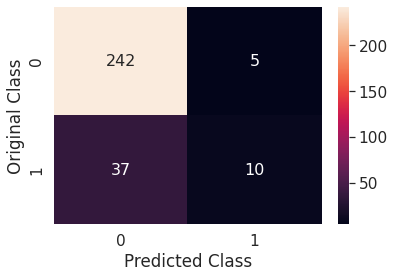

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model_acc = accuracy_score(y_test, lr_model.predict(x_test)) 
lr_model_train_acc=accuracy_score(y_train, lr_model.predict(x_train))*100
lr_model_test_acc=accuracy_score(y_test, lr_model.predict(x_test))*100
print("Train Set Accuracy:"+str(accuracy_score(y_train, lr_model.predict(x_train))*100)) 
print("Test Set Accuracy:"+str(accuracy_score(y_test, lr_model.predict(x_test))*100)) 

plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, lr_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

####Logistic Regression (Feature Importance)

Feature: 0, Score: -0.99224
Feature: 1, Score: 0.13392
Feature: 2, Score: 1.00778
Feature: 3, Score: 0.84209
Feature: 4, Score: 0.37886
Feature: 5, Score: -1.21250
Feature: 6, Score: -1.06471
Feature: 7, Score: -0.31466
Feature: 8, Score: -1.08401
Feature: 9, Score: 0.87729
Feature: 10, Score: -0.89348
Feature: 11, Score: 1.07391
Feature: 12, Score: 1.60153
Feature: 13, Score: -0.36168
Feature: 14, Score: 0.09717
Feature: 15, Score: -0.78965
Feature: 16, Score: -1.18364
Feature: 17, Score: -0.77334
Feature: 18, Score: -0.13560
Feature: 19, Score: 1.51651
Feature: 20, Score: -1.53983
Feature: 21, Score: -0.00548
Feature: 22, Score: 0.00346
Feature: 23, Score: -0.13672
Feature: 24, Score: -0.12254
Feature: 25, Score: 0.06780
Feature: 26, Score: 0.06908
Feature: 27, Score: 0.00571
Feature: 28, Score: -0.54029


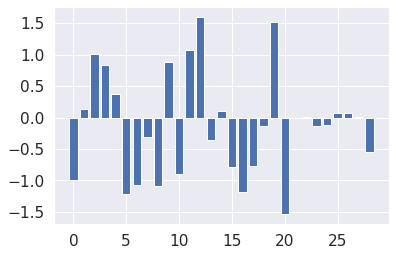

In [ ]:
# get importance
importance = lr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Model2 : Decision Tree

Train test Accuracy:100.0
Test Set Accuracy:76.53061224489795


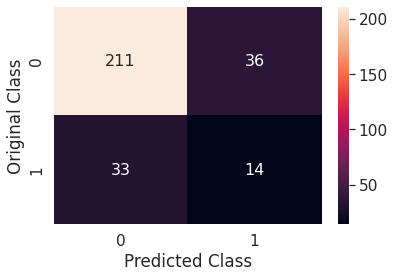

In [ ]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train, y_train)

dtc_model_acc = accuracy_score(y_test, dtc_model.predict(x_test))
dtc_model_train_acc=accuracy_score(y_train, dtc_model.predict(x_train))*100
dtc_model_test_acc=accuracy_score(y_test, dtc_model.predict(x_test))*100
print("Train test Accuracy:"+str(accuracy_score(y_train, dtc_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test, dtc_model.predict(x_test))*100))

plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, dtc_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Feature Importance(decision tree)

Feature: 0, Score: 0.06516
Feature: 1, Score: 0.00732
Feature: 2, Score: 0.00976
Feature: 3, Score: 0.07196
Feature: 4, Score: 0.01190
Feature: 5, Score: 0.01822
Feature: 6, Score: 0.00837
Feature: 7, Score: 0.01566
Feature: 8, Score: 0.02659
Feature: 9, Score: 0.04039
Feature: 10, Score: 0.19011
Feature: 11, Score: 0.04710
Feature: 12, Score: 0.06558
Feature: 13, Score: 0.04230
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.04808
Feature: 16, Score: 0.07696
Feature: 17, Score: 0.02432
Feature: 18, Score: 0.04265
Feature: 19, Score: 0.03376
Feature: 20, Score: 0.03818
Feature: 21, Score: 0.01338
Feature: 22, Score: 0.03521
Feature: 23, Score: 0.01046
Feature: 24, Score: 0.00522
Feature: 25, Score: 0.00754
Feature: 26, Score: 0.00314
Feature: 27, Score: 0.02623
Feature: 28, Score: 0.01444


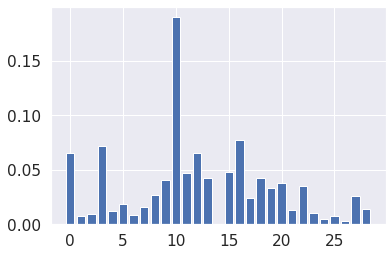

In [ ]:
importance = dtc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Model 3: Random Forest

Train Set Accuracy:100.0
Test Set Accuracy:85.71428571428571


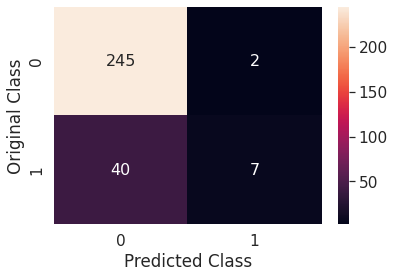

In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train,y_train)

rfc_model_acc=accuracy_score(y_test,rfc_model.predict(x_test))
rfc_model_train_acc=accuracy_score(y_train,rfc_model.predict(x_train))*100
rfc_model_test_acc=accuracy_score(y_test,rfc_model.predict(x_test))*100
print("Train Set Accuracy:"+str(accuracy_score(y_train,rfc_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,rfc_model.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, rfc_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Random forest(feature importance)

Feature: 0, Score: 0.07782
Feature: 1, Score: 0.01635
Feature: 2, Score: 0.01583
Feature: 3, Score: 0.05847
Feature: 4, Score: 0.01135
Feature: 5, Score: 0.02865
Feature: 6, Score: 0.02708
Feature: 7, Score: 0.03379
Feature: 8, Score: 0.03579
Feature: 9, Score: 0.02601
Feature: 10, Score: 0.09670
Feature: 11, Score: 0.04266
Feature: 12, Score: 0.05694
Feature: 13, Score: 0.04242
Feature: 14, Score: 0.00565
Feature: 15, Score: 0.03551
Feature: 16, Score: 0.06422
Feature: 17, Score: 0.03188
Feature: 18, Score: 0.04750
Feature: 19, Score: 0.03330
Feature: 20, Score: 0.04059
Feature: 21, Score: 0.02336
Feature: 22, Score: 0.02790
Feature: 23, Score: 0.01080
Feature: 24, Score: 0.02910
Feature: 25, Score: 0.02487
Feature: 26, Score: 0.01128
Feature: 27, Score: 0.02379
Feature: 28, Score: 0.02036


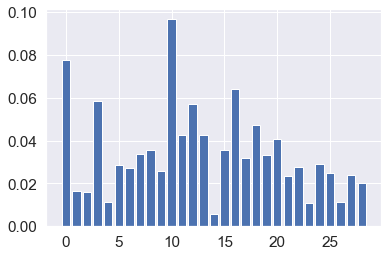

In [ ]:
importance = rfc_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Model 4 : KNN 

Train set Accuracy:86.64965986394559
Test Set Accuracy:84.01360544217688


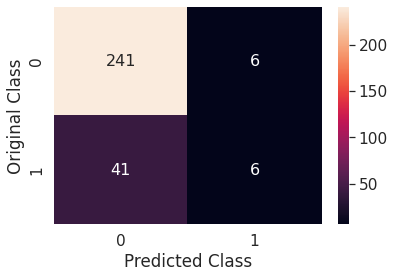

In [ ]:

knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

knn_model_acc = accuracy_score(y_test,knn_model.predict(x_test))
knn_model_train_acc=accuracy_score(y_train,knn_model.predict(x_train))*100
knn_model_test_acc=accuracy_score(y_test,knn_model.predict(x_test))*100
print("Train set Accuracy:"+str(accuracy_score(y_train,knn_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,knn_model.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, knn_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Model 5: Support Vector Classifier

Train set Accuracy:88.01020408163265
Test Set Accuracy:84.6938775510204


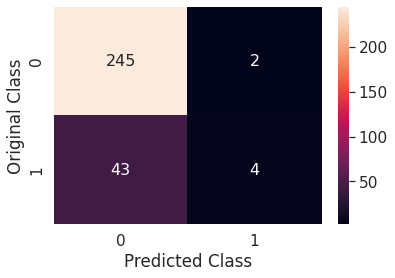

In [ ]:
sv_model = SVC()
sv_model.fit(x_train,y_train)

sv_model_acc = accuracy_score(y_test,sv_model.predict(x_test))
sv_model_train_acc=accuracy_score(y_train,sv_model.predict(x_train))*100
sv_model_test_acc=accuracy_score(y_test,sv_model.predict(x_test))*100
print("Train set Accuracy:"+str(accuracy_score(y_train,sv_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,sv_model.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, sv_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Model 6: Gaussian Naive Bayes

Train set Accuracy:79.16666666666666
Test Set Accuracy:77.89115646258503


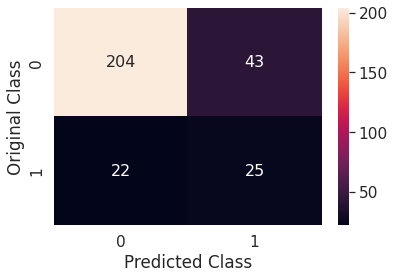

In [ ]:
naive_model = GaussianNB()
naive_model.fit(x_train,y_train)

naive_model_acc = accuracy_score(y_test,naive_model.predict(x_test))
naive_model_train_acc=accuracy_score(y_train,naive_model.predict(x_train))*100
naive_model_test_acc=accuracy_score(y_test,naive_model.predict(x_test))*100
print("Train set Accuracy:"+str(accuracy_score(y_train,naive_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,naive_model.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, naive_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Model 7: XG boost(Without Parameter Tuning )

Train set Accuracy:93.11224489795919
Test Set Accuracy:84.01360544217688


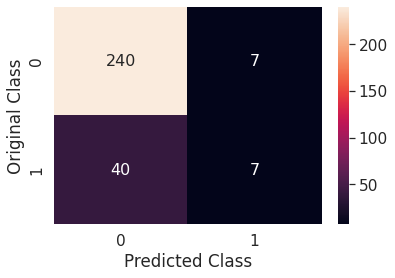

In [ ]:
xgb_cl = XGBClassifier()
xgb_cl.fit(x_train,y_train)

xgb_cl_acc = accuracy_score(y_test,xgb_cl.predict(x_test))
xgb_cl_train_acc=accuracy_score(y_train,xgb_cl.predict(x_train))*100
xgb_cl_test_acc=accuracy_score(y_test,xgb_cl.predict(x_test))*100
print("Train set Accuracy:"+str(accuracy_score(y_train,xgb_cl.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,xgb_cl.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, xgb_cl.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### XG Boost(Feature Importance)

Feature: 0, Score: 0.03712
Feature: 1, Score: 0.02872
Feature: 2, Score: 0.02449
Feature: 3, Score: 0.03705
Feature: 4, Score: 0.02835
Feature: 5, Score: 0.03633
Feature: 6, Score: 0.03639
Feature: 7, Score: 0.04079
Feature: 8, Score: 0.03746
Feature: 9, Score: 0.04860
Feature: 10, Score: 0.05222
Feature: 11, Score: 0.03328
Feature: 12, Score: 0.10632
Feature: 13, Score: 0.02863
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.05647
Feature: 16, Score: 0.03728
Feature: 17, Score: 0.02704
Feature: 18, Score: 0.03626
Feature: 19, Score: 0.03735
Feature: 20, Score: 0.04445
Feature: 21, Score: 0.02961
Feature: 22, Score: 0.02322
Feature: 23, Score: 0.02023
Feature: 24, Score: 0.02007
Feature: 25, Score: 0.01676
Feature: 26, Score: 0.01773
Feature: 27, Score: 0.02890
Feature: 28, Score: 0.02885


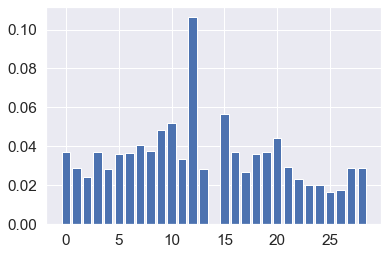

In [ ]:
importance = xgb_cl.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### XG Boost (Grid search for parameter tuning)

In [ ]:
#reference: https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = XGBClassifier()

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(x_train,y_train)

In [ ]:
grid_cv.best_score_

0.808630221976137

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.8}

### Model 8: XG Boost (After Grid search)

Train set Accuracy:92.77210884353741
Test Set Accuracy:86.05442176870748


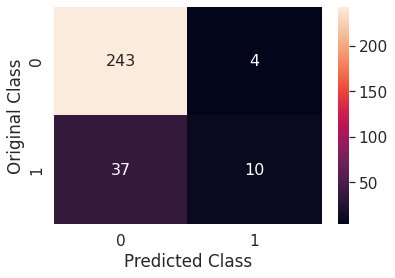

In [ ]:
xgb_cl_model=XGBClassifier(colsample_bytree= 0.5,
 gamma= 0,
 learning_rate= 0.1,
 max_depth= 3,
 reg_lambda= 1,
 scale_pos_weight= 1,
 subsample= 0.8)
xgb_cl_model.fit(x_train,y_train)
xgb_cl_model_acc = accuracy_score(y_test,xgb_cl_model.predict(x_test))
xgb_cl_model_train_acc=accuracy_score(y_train,xgb_cl_model.predict(x_train))*100
xgb_cl_model_test_acc=accuracy_score(y_test,xgb_cl_model.predict(x_test))*100
print("Train set Accuracy:"+str(accuracy_score(y_train,xgb_cl_model.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,xgb_cl_model.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, xgb_cl_model.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### XG Boost (Feature importance)

Feature: 0, Score: 0.03545
Feature: 1, Score: 0.02576
Feature: 2, Score: 0.02928
Feature: 3, Score: 0.02768
Feature: 4, Score: 0.02569
Feature: 5, Score: 0.02810
Feature: 6, Score: 0.10100
Feature: 7, Score: 0.03505
Feature: 8, Score: 0.03817
Feature: 9, Score: 0.03343
Feature: 10, Score: 0.04719
Feature: 11, Score: 0.03321
Feature: 12, Score: 0.09446
Feature: 13, Score: 0.02785
Feature: 14, Score: 0.00641
Feature: 15, Score: 0.05205
Feature: 16, Score: 0.04387
Feature: 17, Score: 0.03010
Feature: 18, Score: 0.03198
Feature: 19, Score: 0.02847
Feature: 20, Score: 0.02930
Feature: 21, Score: 0.02645
Feature: 22, Score: 0.02292
Feature: 23, Score: 0.02083
Feature: 24, Score: 0.02083
Feature: 25, Score: 0.02572
Feature: 26, Score: 0.01867
Feature: 27, Score: 0.02680
Feature: 28, Score: 0.03327


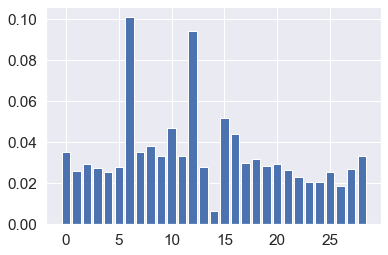

In [ ]:
importance = xgb_cl_model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'Decision tree', 'Random forest model', 'KNN model',
                       'SVM Model', 'Gaussian model', 'Xgboost without Grid search parameter tuning','Xgboost with Grid search parameter tuning' ],
                       'Accuracy': [lr_model_acc,dtc_model_acc, rfc_model_acc, knn_model_acc, sv_model_acc, naive_model_acc,xgb_cl_acc,xgb_cl_model_acc],
                       'Train Accuracy':[lr_model_train_acc,dtc_model_train_acc, rfc_model_train_acc, knn_model_train_acc, sv_model_train_acc, naive_model_train_acc,xgb_cl_train_acc,xgb_cl_model_train_acc]})

models.sort_values(by = 'Accuracy', ascending = False) 

Model  Accuracy  Train Accuracy
7     Xgboost with Grid search parameter tuning  0.860544       92.772109
0                           Logistic Regression  0.857143       86.819728
2                           Random forest model  0.857143      100.000000
4                                     SVM Model  0.846939       88.010204
3                                     KNN model  0.840136       86.649660
6  Xgboost without Grid search parameter tuning  0.840136       93.112245
5                                Gaussian model  0.778912       79.166667
1                                 Decision tree  0.765306      100.000000

#### Observation


*   In this Particular Business problem we observed that Employee attrition can be happened due to multiple factor and analyse the various feature which play the important role in Employee attrition.

*   Analysis of data help us to understand the business context as well as the Help us to take certain measure to reduce it and find some insight from our data

*   Our Approach as follows-
    * EDA:- EDA help us to understand the type and behaviour of data.We have profrmed  Correlation matrix, Bar plot etc.
    * Data preprocessing and cleaning:-we have performed data preprocessing and cleamning before feeding data into ML model . It include dropping of null value analze imbalancing of data and data transforming.
    * Feature Engineering:- We have performed the feature engineering on it like Imputation, Categorical Encoding,Scaling.
    * Data Preaparation:- Make our data ready for Model training and perform stratification of data keeping in mind that our data is imbalanced data.
    * Modelling :- We have performed training on various ML algorithm and compare the training and testing accuracy and found that some model is Overfitting and doesn't perform very well in tesing dataset. we have also performed Feature importance output for each model and trained ML model with more important feature. we have also printed the confusion matrix for each model so that we can have idea of precision , recall anf F1 metrics to evaluate our model in a more precise way.
    * Final Model: After performing all trial with lots of ML model we found that XG boost model with parameter tuning is performing the best among all ML model. So we have choosen XGboost model as our final model with Train accuracy 92 % and test Accuracy of 86 %.
* we can do more feature engineering task on avaialable data to trained our model and get more Accuracy from result.



